# Pybar (matplotlib hw)

Written by George Bigham 7/17/19

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
main_df = pd.merge(ride_df, city_df, on="city", how="left")

# Display the data table for preview
main_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

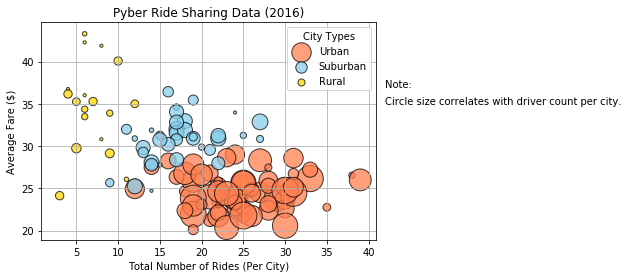

In [2]:
# Obtain the x and y coordinates and driver counts for each of the three city types
urban_df = main_df[main_df["type"] == "Urban"]
suburban_df = main_df[main_df["type"] == "Suburban"]
rural_df = main_df[main_df["type"] == "Rural"]

u_cities = urban_df.groupby("city") 
u_rides = u_cities["city"].count()
u_avg_fare = u_cities["fare"].mean()
u_drivers = u_cities["driver_count"].mean()

s_cities = suburban_df.groupby("city") 
s_rides = s_cities["city"].count()
s_avg_fare = s_cities["fare"].mean()
s_drivers = s_cities["driver_count"].mean()

r_cities = rural_df.groupby("city") 
r_rides = r_cities["city"].count()
r_avg_fare = r_cities["fare"].mean()
r_drivers = r_cities["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(u_rides, u_avg_fare, s=u_drivers*10, color="coral", label="Urban", 
            edgecolors="k", alpha=0.75)
plt.scatter(s_rides, s_avg_fare, s=s_drivers*10, color="skyblue", label="Suburban",
            edgecolors="k", alpha=0.75)
plt.scatter(r_rides, r_avg_fare, s=r_drivers*10, color="gold", label="Rural",
            edgecolors="k", alpha=0.75)

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
plt.legend(title="City Types")

# Incorporate a text label regarding circle size
plt.text(text="Note:", y=37, x=42, s=20)
plt.text(text="Circle size correlates with driver count per city.", y=35, x=42, s=20)

# Save Figure
plt.savefig("pyber_ride_data.png")

## Total Fares by City Type

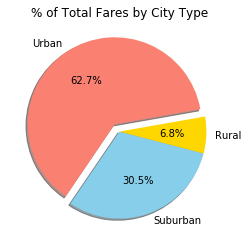

In [3]:
# Calculate Type Percents
u_tot_fare = u_cities["fare"].sum().sum()
s_tot_fare = s_cities["fare"].sum().sum()
r_tot_fare = r_cities["fare"].sum().sum()

fares_by_city_type = np.array([u_tot_fare, s_tot_fare, r_tot_fare])

tot_fares = fares_by_city_type.sum()
perc_of_tot = fares_by_city_type/tot_fares


# Build Pie Chart
explode = (0.1, 0, 0)
plt.pie(perc_of_tot, explode=explode, 
        labels=["Urban", "Suburban", "Rural"], 
        colors=["salmon", "skyblue", "gold"],
        autopct="%1.1f%%", shadow=True, startangle=10, 
        counterclock = True)
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig("total_fares_by_city_type.png")

## Total Rides by City Type

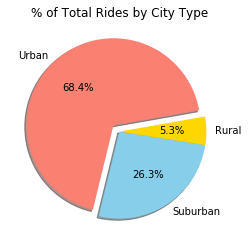

In [4]:
# Calculate Ride Percents
u_rides = len(urban_df)
s_rides = len(suburban_df)
r_rides = len(rural_df)
rides_by_city_type = np.array([u_rides, s_rides, r_rides])

perc_rides = rides_by_city_type/rides_by_city_type.sum()

# Build Pie Chart
explode = (0.1, 0, 0)
plt.pie(perc_rides, explode=explode, 
        labels=["Urban", "Suburban", "Rural"], 
        colors=["salmon", "skyblue", "gold"],
        autopct="%1.1f%%", shadow=True, startangle=10, 
        counterclock = True)
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig("total_rides_by_city_type.png")

## Total Drivers by City Type

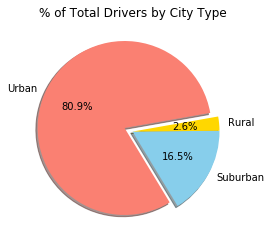

In [5]:
# Calculate Driver Percents
u_tot_drivers = u_cities["driver_count"].mean().sum()
s_tot_drivers = s_cities["driver_count"].mean().sum()
r_tot_drivers = r_cities["driver_count"].mean().sum()

drivers_by_city_type = np.array([u_tot_drivers, s_tot_drivers, r_tot_drivers])
perc_drivers = drivers_by_city_type/drivers_by_city_type.sum()

# Build Pie Charts
explode = (0.1, 0, 0)
plt.pie(perc_drivers, explode=explode, 
        labels=["Urban", "Suburban", "Rural"], 
        colors=["salmon", "skyblue", "gold"],
        autopct="%1.1f%%", shadow=True, startangle=10, 
        counterclock = True)
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig("total_drivers_by_city_type.png")